In [58]:
import sympy
sympy.init_printing()
import numpy
from sympy.plotting import plot  #para plotear 2 variables
import matplotlib.pyplot as plt
%matplotlib inline

t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

f = sympy.exp(-a*t)
f

In [28]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))

⎧       1                         π
⎪   ─────────      for │arg(s)│ ≤ ─
⎪     ⎛a    ⎞                     2
⎪   s⋅⎜─ + 1⎟                      
⎪     ⎝s    ⎠                      
⎪                                  
⎨∞                                 
⎪⌠                                 
⎪⎮  -a⋅t  -s⋅t                     
⎪⎮ ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                 
⎪0                                 
⎩                                  

In [3]:
sympy.laplace_transform(f, t, s)

⎛  1           ⎞
⎜─────, 0, True⎟
⎝a + s         ⎠

In [4]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [5]:
F=L(f)
F

In [6]:
f_=invL(F)
f_

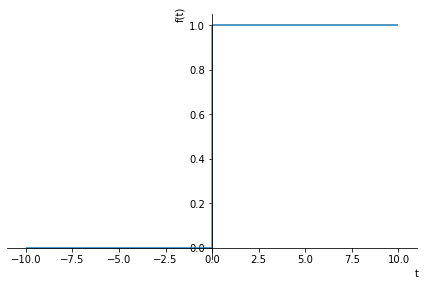

In [7]:
sympy.plot(sympy.Heaviside(t));

In [8]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

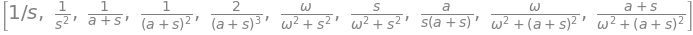

In [9]:
Fs = [L(f) for f in functions]
Fs

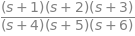

In [10]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))
display(F)
F.apart(s)

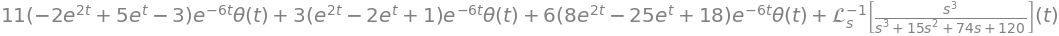

In [11]:
display(invL(F))
invL(F.apart(s))

In [12]:
s = sympy.Symbol('s')
t = sympy.Symbol('t', real=True)
tau = sympy.Symbol('tau', real=True, positive=True)
G = K/(tau*s + 1)
G

In [44]:
u = 1/s
stepresponse = invL(G*u)
stepresponse

In [45]:
u = 1/s**2
rampresponse = invL(G*u)
rampresponse

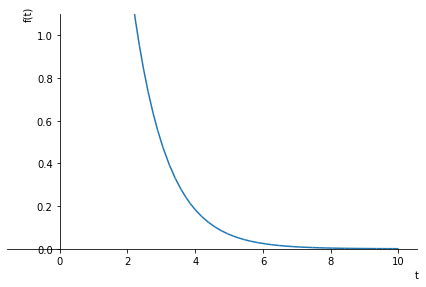

In [47]:
g = sympy.inverse_laplace_transform(G.subs({tau: 1,K:10}), s, t)
display(g)
sympy.plot(g, (t, -1, 10), ylim=(0, 1.1))

In [49]:
s = sympy.symbols("s")
w = sympy.symbols("omega", real=True)
display(G)
Gw = G.subs({tau : 1,K:10, s : sympy.I*w})
Gw

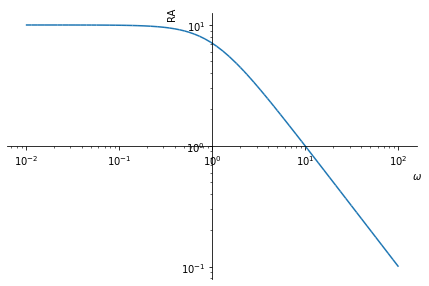

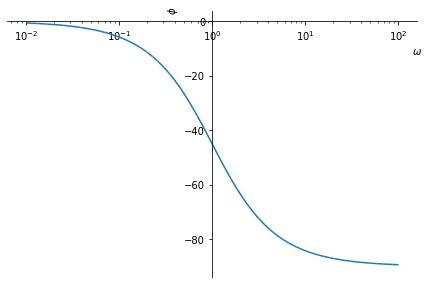

In [50]:
RA = abs(Gw)
phi = sympy.arg(Gw)
sympy.plot(RA, (w, 0.01, 100), xscale="log", yscale="log", ylabel="RA", xlabel="$\omega$")
sympy.plot(phi*180/sympy.pi, (w, 0.01, 100), xscale="log", xlabel="$\omega$", ylabel="$\phi$")

In [51]:
from ipywidgets import interact
evalfimpulse = sympy.lambdify((K, tau, t), impulseresponse, 'numpy')
evalfstep = sympy.lambdify((K, tau, t), stepresponse, 'numpy')
evalframp = sympy.lambdify((K, tau, t), rampresponse, 'numpy')

In [55]:
ts = numpy.linspace(0, 10)

def firstorder(tau_in, K_in):
    plt.figure(figsize=(12, 6))
    ax_impulse = plt.subplot2grid((2, 2), (0, 0))
    ax_step = plt.subplot2grid((2, 2), (1, 0))
    ax_complex = plt.subplot2grid((2, 2), (0, 1), rowspan=2)

    ax_impulse.plot(ts, evalfimpulse(K_in, tau_in, ts))
    ax_impulse.set_title('Impulse response')
    ax_impulse.set_ylim(0, 10)

    tau_height = 1 - numpy.exp(-1)
    ax_step.set_title('Step response')
    ax_step.plot(ts, evalfstep(K_in, tau_in, ts))
    ax_step.axhline(K_in)
    ax_step.plot([0, tau_in, tau_in], [K_in*tau_height]*2 + [0], alpha=0.4)
    ax_step.text(0, K_in, '$K=${}'.format(K_in))
    ax_step.text(0, K_in*tau_height, '{:.3}$K$'.format(tau_height))
    ax_step.text(tau_in, 0, r'$\tau={:.3}$'.format(tau_in))
    ax_step.set_ylim(0, 10)

    ax_complex.set_title('Poles plot')
    ax_complex.scatter(-1/tau_in, 0, marker='x', s=30)
    ax_complex.axhline(0, color='black')
    ax_complex.axvline(0, color='black')
    ax_complex.axis([-10, 10, -10, 10])

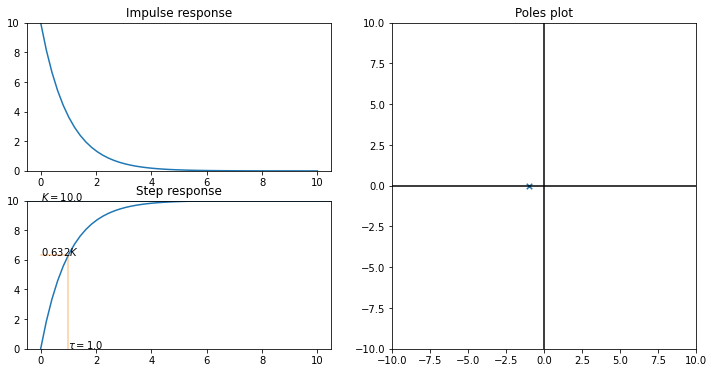

In [56]:
firstorder(1., 10.)